In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
import re
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

<a id='wrangling'></a>
## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">2| Data Wrangling</div>

In [3]:
newspaper_df = pd.read_excel("./data/NewspaperChurn.xlsx")

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>Some Information</b></font>
</div>

In [4]:
display(newspaper_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SubscriptionID      15855 non-null  int64 
 1   HH Income           15855 non-null  object
 2   Home Ownership      15855 non-null  object
 3   Ethnicity           15855 non-null  object
 4   dummy for Children  15855 non-null  object
 5   Year Of Residence   15855 non-null  int64 
 6   Age range           15747 non-null  object
 7   Language            14848 non-null  object
 8   Address             15855 non-null  object
 9   State               15855 non-null  object
 10  City                15855 non-null  object
 11  County              15855 non-null  object
 12  Zip Code            15855 non-null  int64 
 13  weekly fee          15669 non-null  object
 14  Deliveryperiod      15855 non-null  object
 15  Nielsen Prizm       15726 non-null  object
 16  reward program      15

None

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>Statistics</b></font>
</div>

In [5]:
display(newspaper_df.describe())

,SubscriptionID,Year Of Residence,Zip Code,reward program
count,1.585500e+04,15855.000000,15855.000000,15855.000000
mean,1.643729e+08,13.546137,92424.541911,1.100662
std,2.356755e+07,11.770368,733.648427,9.555332
min,1.100011e+08,1.000000,90603.000000,0.000000
25%,1.501824e+08,4.000000,92627.000000,0.000000
50%,1.803333e+08,10.000000,92688.000000,0.000000
75%,1.806362e+08,21.000000,92806.000000,0.000000
max,1.815541e+08,56.000000,92887.000000,353.000000


<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>Unique item counts on each row</b></font>
</div>

In [6]:
print(f'Total number of data entries: {newspaper_df.shape[0]}')
print()

for col in newspaper_df.columns:
    print(f'Unique values in column \'{col}\': {newspaper_df[col].nunique()}')

Total number of data entries: 15855

Unique values in column 'SubscriptionID': 15855
Unique values in column 'HH Income': 18
Unique values in column 'Home Ownership': 2
Unique values in column 'Ethnicity': 73
Unique values in column 'dummy for Children': 2
Unique values in column 'Year Of Residence': 56
Unique values in column 'Age range': 12
Unique values in column 'Language': 37
Unique values in column 'Address': 15742
Unique values in column 'State': 1
Unique values in column 'City': 56
Unique values in column 'County': 4
Unique values in column 'Zip Code': 117
Unique values in column 'weekly fee': 14
Unique values in column 'Deliveryperiod': 28
Unique values in column 'Nielsen Prizm': 9
Unique values in column 'reward program': 116
Unique values in column 'Source Channel': 51
Unique values in column 'Subscriber': 2


<a id="2"></a>
## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">3| Data Cleaning</div>

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>3.1 | Convert data type</b></font>
</div>

In [7]:
process_df=newspaper_df.copy()

- HH Income

In [8]:
def preprocess_hh_income(df):
    """
    HH Income 열을 전처리하여:
    1. `plus`나 `under`가 포함된 값을 평균값으로 대체
    2. 범위 데이터(`$30,000 - $39,999`)는 평균값으로 변환
    3. 기호(`$`, `,`) 제거
    """
    # 1. "plus" 또는 "under"가 포함된 행을 마스킹
    mask = df['HH Income'].str.contains('plus|under', case=False, na=False)
    
    # 2. 범위 데이터를 평균값으로 변환 (plus/under 제외)
    def process_value(value):
        try:
            # 기호 제거
            clean_value = str(value).replace('$', '').replace(',', '')
            
            # 범위 처리 (예: "30000-39999")
            if '-' in clean_value:
                low, high = map(int, clean_value.split('-'))
                return (low + high) / 2
            # 숫자 처리
            elif clean_value.isdigit():
                return float(clean_value)
            else:
                return np.nan  # plus/under는 NaN 처리
        except:
            return np.nan
    
    # 3. 전체 열을 숫자로 변환 (plus/under는 NaN)
    df['HH Income_Processed'] = df['HH Income'].apply(process_value)
    
    # 4. 평균값 계산 (plus/under 제외)
    valid_mean = df.loc[~mask, 'HH Income_Processed'].mean()
    
    # 5. plus/under가 포함된 행을 평균값으로 대체
    df.loc[mask, 'HH Income_Processed'] = valid_mean
    
    # 6. 원본 열 대체
    df['HH Income'] = df['HH Income_Processed'].round(0).astype(int)
    df = df.drop('HH Income_Processed', axis=1)
    
    return df
process_df=preprocess_hh_income(process_df)
#process_df['HH Income'] =process_df['HH Income'].apply(preprocess_income)

- Home Ownership

In [9]:
def preprocess_home_ownership(df):
    df['Home Ownership'] = df['Home Ownership'].map({'OWNER': 1, 'RENTER': 0})
    return df

process_df = preprocess_home_ownership(process_df)

- dummy for Children

In [10]:
# 자녀가 있으면 1, 없으면 0    
def preprocess_dummy(df):
    df['dummy for Children'] = np.where(df['dummy for Children'] == 'Y', 1, 0)
    return df

process_df = preprocess_dummy(process_df)

- Age range

In [11]:
def preprocess_age(value):
    if pd.isnull(value):
        return None
    
    match = re.findall(r'\d[\d,]*', str(value))
    num = [int(x.replace(',', '')) for x in match]

    if len(num) == 2:
        return (num[0] + num[1]) / 2
    elif len(num) == 1:
        return num[0]
    else:
        return None
    
process_df['Age range'] =process_df['Age range'].apply(preprocess_age)


- weekly fee

In [12]:
def preprocess_fee(x):
    if pd.isnull(x):
        return np.nan
    nums = [float(i.replace('$','').replace(',','')) for i in x.split('-')]
    return np.mean(nums)


process_df['weekly fee'] =process_df['weekly fee'].apply(preprocess_fee)        

- Deliveryperiod

In [13]:
def preprocess_deliveryperiod(df):
    # 온라인 배송 타입 정의
    online = {
        '7DayT', 'Fri-SunT', 'Sun-FriT', 'Thu-SunT', 
        'SoooTFST', 'Fri-SunT', 'SooooFST', 'SoooooST', 'SunOnlyT', 'SooooooT'
    }


    period_map = {
        '7Day': 7, '7DAY': 7, '7day': 7, '7DayOL': 7, '7DayT': 7,
        'Fri-Sun': 6, 'Fri-SunT': 6, 'Sun-Fri': 6, 'Sun-FriT': 6,
        'oMTWTFo': 5, 'Mon-Fri': 5,
        'Thu-Sun': 4, 'THU-SUN': 4, 'thu-sun': 4, 'SoooTFS': 4, 'SoooTFST': 4, 'Thu-SunT': 4,
        'SooooFS': 3, 'SooooFST': 3, 'Fri-SunT': 3, 'Fri-Sun': 3,
        'SatSun': 2, 'SoooooS': 2, 'SoooooST': 2,
        'SunOnly': 1, 'SunOnlyT': 1, 'sunonly': 1, 'SUNONLY': 1, 'Soooooo': 1, 'SooooooT': 1
    }

    df['Is_Online'] = df['Deliveryperiod'].apply(lambda x: 1 if x in online else 0)
    df['Deliveryperiod'] = df['Deliveryperiod'].map(period_map)

    return df

process_df = preprocess_deliveryperiod(process_df)

- Nielsen Prizm

In [14]:
def preprocess_nielsen_prizm(df):
    nielsen_mapping = {
        'FM': 0,  # Female Middle-aged
        'MW': 1,  # Male Working-age
        'MM': 2,  # Male Middle-aged
        'FW': 3,  # Female Working-age
        'YW': 4,  # Young Woman
        'YM': 5,  # Young Man
        'ME': 6,  # Male Elderly
        'FE': 7,  # Female Elderly
        'YE': 8   # Young Elderly
    }
    
    # 'Nielsen Prizm'을 매핑된 숫자로 변환, NaN 값은 그대로 두기
    df['Nielsen Prizm'] = df['Nielsen Prizm'].map(nielsen_mapping).fillna(df['Nielsen Prizm'])
    
    # process_working 함수 호출
    df = preprocess_working(df)
    
    # process_gender 함수 호출
    df = preprocess_gender(df)
    
    return df

# 2. 근로 중 여부 (중이면 1, 아니면 0)
def preprocess_working(df):
    # NaN 값 처리 없이 근로 여부만 확인
    df['Working'] = df['Nielsen Prizm'].apply(lambda x: 1 if x in [1, 3] else 0 if pd.notnull(x) else x)
    return df

# 3. 성별 (남 : 0, 여: 1)
def preprocess_gender(df):
    # 기본 성별 처리  # NaN 값이 있을 경우 NaN 그대로 두기
    df['Gender'] = df['Nielsen Prizm'].apply(lambda x: 0 if x in [1, 2, 5, 6] else 1 if pd.notnull(x) else x)
    
    # 'YE' (Young Elderly) 처리: 25명 남성 (0), 26명 여성 (1) 랜덤으로 배분
    ye_indices = df[df['Nielsen Prizm'] == 8].index  # 'YE'에 해당하는 인덱스 찾기
    
    # 랜덤 시드를 고정하여 항상 동일한 결과가 나오도록 설정
    random.seed(42)  # 시드 값 (고정된 숫자)
    
    # 'YE'에 해당하는 인덱스의 길이에 맞는 gender_assignment 리스트 생성
    gender_assignment = [0] * (len(ye_indices) // 2) + [1] * (len(ye_indices) - len(ye_indices) // 2)  # 남성 25명, 여성 26명
    random.shuffle(gender_assignment)  # 섞기
    
    # YE 인덱스에 해당하는 성별 값을 할당
    df.loc[ye_indices, 'Gender'] = gender_assignment
    
    return df

process_df =preprocess_nielsen_prizm(process_df)

- reward program

In [15]:
#  1 이상은 1, 그외에는 0 (결측치 포함)
def preprocess_reward_program(df):
    df['reward program'] = df['reward program'].apply(lambda x: 1 if x >= 1 else 0)
    return df

process_df = preprocess_reward_program(process_df)

- Subscriber

In [16]:
# No : 1, Yes :0
def preprocess_subscriber(df):
    df['Subscriber'] = df['Subscriber'].map({'NO': 1, 'YES': 0})
    return df

process_df =preprocess_subscriber(process_df)

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>3.2 | Drop columns </b></font>
</div>

In [17]:
drop_df=process_df.copy()
drop_df = drop_df.drop(['Ethnicity', 'Language', 'Address', 'State', 'City', 'County', 'Zip Code', 'Source Channel','Nielsen Prizm'], axis=1)

In [18]:
drop_df.head(4)

,SubscriptionID,HH Income,Home Ownership,dummy for Children,Year Of Residence,Age range,weekly fee,Deliveryperiod,reward program,Subscriber,Is_Online,Working,Gender
0,180590686,35000,0,0,1,27.0,7.495,7,0,1,0,0.0,1.0
1,181401653,116785,1,1,14,52.0,0.255,1,0,0,0,1.0,0.0
2,180374685,112500,1,1,7,47.0,0.255,1,0,0,0,1.0,0.0
3,180703483,225000,1,0,23,57.0,1.495,1,1,1,0,1.0,0.0


<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>3.3 | Check For Duplicates</b></font>
</div>

In [19]:
# print duplicated SubscriptionID
duplicated_ids = drop_df["SubscriptionID"][drop_df["SubscriptionID"].duplicated()]
print(duplicated_ids.unique())

[]


In [20]:
drop_df = drop_df.drop(['SubscriptionID'], axis=1)

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>3.4 | Handleing nan values</b></font>
</div>

In [21]:
# 결측치 확인
print(drop_df.isnull().sum())

# 특정열 확인
print(f'\nAge range 결측치 개수 : {drop_df['Age range'].isnull().sum()}')
# Age range 결측치 개수 : 108

print(f'weekly fee 결측치 개수 : {drop_df['weekly fee'].isnull().sum()}')
# weekly fee 결측치 개수 : 186

print(f'Working	결측치 개수 : {drop_df['Working'].isnull().sum()}')
# Working 결측치 개수 : 129 # = Gender 결측 # Nielsen Prizm 에서 파생됐으므로

HH Income               0
Home Ownership          0
dummy for Children      0
Year Of Residence       0
Age range             108
weekly fee            186
Deliveryperiod          0
reward program          0
Subscriber              0
Is_Online               0
Working               129
Gender                129
dtype: int64

Age range 결측치 개수 : 108
weekly fee 결측치 개수 : 186
Working	결측치 개수 : 129


In [22]:
no_nan_df = drop_df.copy()

# 결측치 제거
no_nan_df.dropna(subset=['Working'], inplace=True)

# 결측치 평균으로 대체
no_nan_df['HH Income'] = no_nan_df['HH Income'].fillna(no_nan_df['HH Income'].mean())
no_nan_df['Age range'] = no_nan_df['Age range'].fillna(no_nan_df['Age range'].mean())
no_nan_df['weekly fee'] = no_nan_df['weekly fee'].fillna(no_nan_df['weekly fee'].mean())


In [23]:
no_nan_df['Gender'] = no_nan_df['Gender'].astype(int)
no_nan_df['Working'] = no_nan_df['Working'].astype(int)
no_nan_df['Age range'] = np.floor(no_nan_df['Age range']).astype(int)
no_nan_df.rename(columns={'Age range': 'Age'}, inplace=True)

no_nan_df.isnull().sum()

HH Income             0
Home Ownership        0
dummy for Children    0
Year Of Residence     0
Age                   0
weekly fee            0
Deliveryperiod        0
reward program        0
Subscriber            0
Is_Online             0
Working               0
Gender                0
dtype: int64

- ### 이상치 확인 및 제거(?)

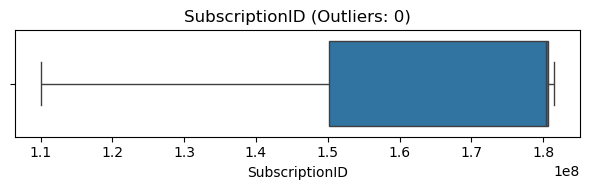

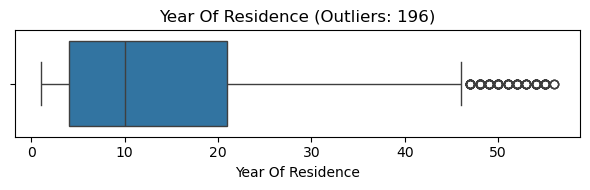

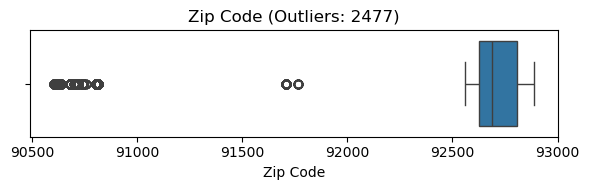

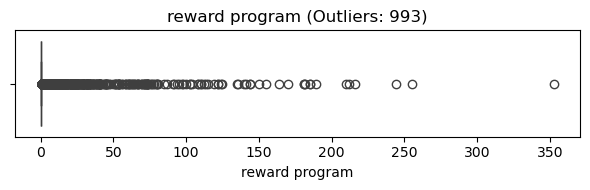

In [24]:
numeric_df = newspaper_df.select_dtypes(include='number')

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = numeric_df[(numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    plt.figure(figsize=(6, 2))
    sns.boxplot(x=numeric_df[col])
    plt.title(f'{col} (Outliers: {outlier_count})')
    plt.tight_layout()
    plt.show()

<a id='eda'></a>
## <div style="text-align: left; background-color: #BB4ED8; font-family: Trebuchet MS; color: white; padding: 15px; line-height: 1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 25px">4|Exploratory Data Analysis</div>

### 기본적인 데이터 분포 분석 및 시각화

- #### 상관관계 확인

In [25]:
df_vis=no_nan_df.copy()

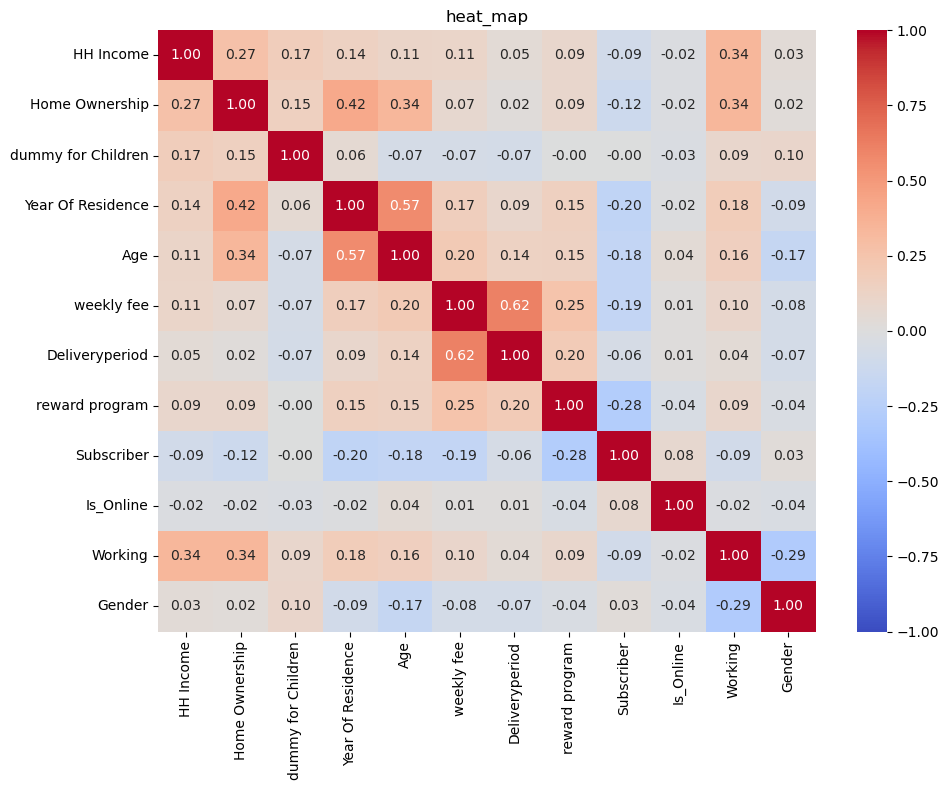

In [26]:
# 상관관계 히트맵
# selected_numeric_cols = ['HH Income', 'Age', 'weekly fee', 'Year Of Residence', 'reward program', 'Subscriber']
# correlation_matrix = df_vis[selected_numeric_cols].corr()
correlation_matrix=df_vis.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("heat_map")
plt.tight_layout()
plt.show()

- 가장 높은 음의 상관을 보이는 변수는 reward program
- 나이와 주간 요금은 고객 유지율과 약한 음의 관계
- 성별, 온라인 여부, 자녀 여부는 거의 무상관

## <div style="text-align: left; background-color: #ffd700; font-family: Trebuchet MS; padding: 15px; line-height: 1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 22px; color:#333">Research Question 1 | 이탈 여부 분포</div>

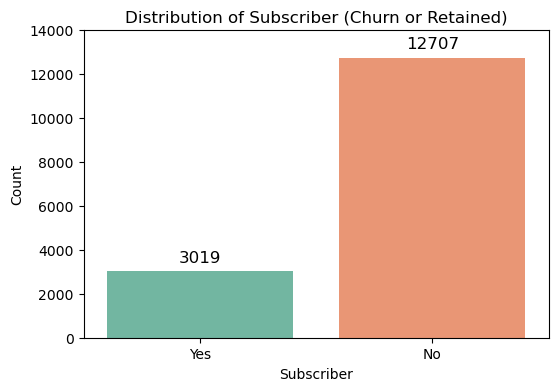

In [27]:
# 시각화에서만 Subscriber 값을 0 → 'Yes', 1 → 'No'로 변경
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_vis, x='Subscriber', palette='Set2')
ax.set_xticklabels(['Yes', 'No'])  # x축 레이블을 변경

# 각 막대 위에 개수 표시 (조금 더 위로 올리기)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # 개수를 정수형으로 표시
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 10), textcoords='offset points')  # 텍스트를 10픽셀 위로 이동

# 그래프 제목과 라벨 설정
plt.title('Distribution of Subscriber (Churn or Retained)')
plt.xlabel('Subscriber')
plt.ylabel('Count')

# y축 최대값 설정
plt.ylim(0, 14000)

# 그래프 표시
plt.show()


No가 Yes보다 약 4배 많았음. 클래스 불균형이 확인됨.

## <div style="text-align: left; background-color: #ffd700; font-family: Trebuchet MS; padding: 15px; line-height: 1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 22px; color:#333">Research Question 2 | 카테고리별 이탈 비율</div>

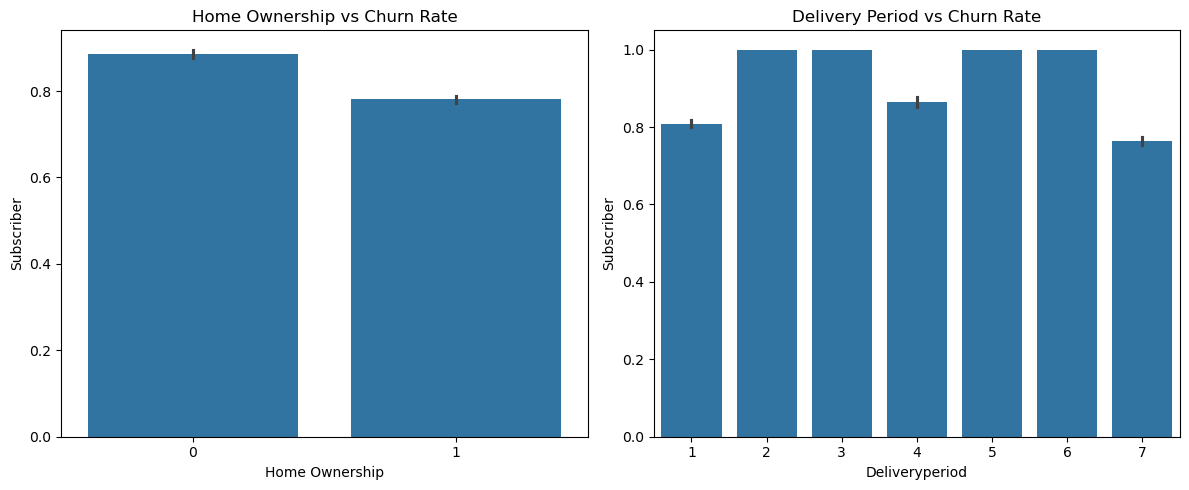

                샘플 수      안이탈률
Deliveryperiod                
1               6472  0.808714
2                311  1.000000
3                217  1.000000
4               2734  0.865033
5                  9  1.000000
6                  8  1.000000
7               5975  0.763682


In [28]:

# 시각화: 5. 카테고리별 이탈 비율
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Home Ownership', y='Subscriber', data=df_vis)
plt.title('Home Ownership vs Churn Rate')

plt.subplot(1, 2, 2)
sns.barplot(x='Deliveryperiod', y='Subscriber', data=df_vis)
#plt.xticks(rotation=90)
plt.title('Delivery Period vs Churn Rate')
plt.tight_layout()
plt.show()

# 각 배송 기간의 샘플 수와 이탈률 확인
delivery_stats = df_vis.groupby('Deliveryperiod')['Subscriber'].agg(['count', 'mean'])
delivery_stats.rename(columns={'count': '샘플 수', 'mean': '안이탈률'}, inplace=True)
print(delivery_stats)


- 
- 

## <div style="text-align: left; background-color: #ffd700; font-family: Trebuchet MS; padding: 15px; line-height: 1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 22px; color:#333">Research Question 3 | 연속형 변수 시각화</div>

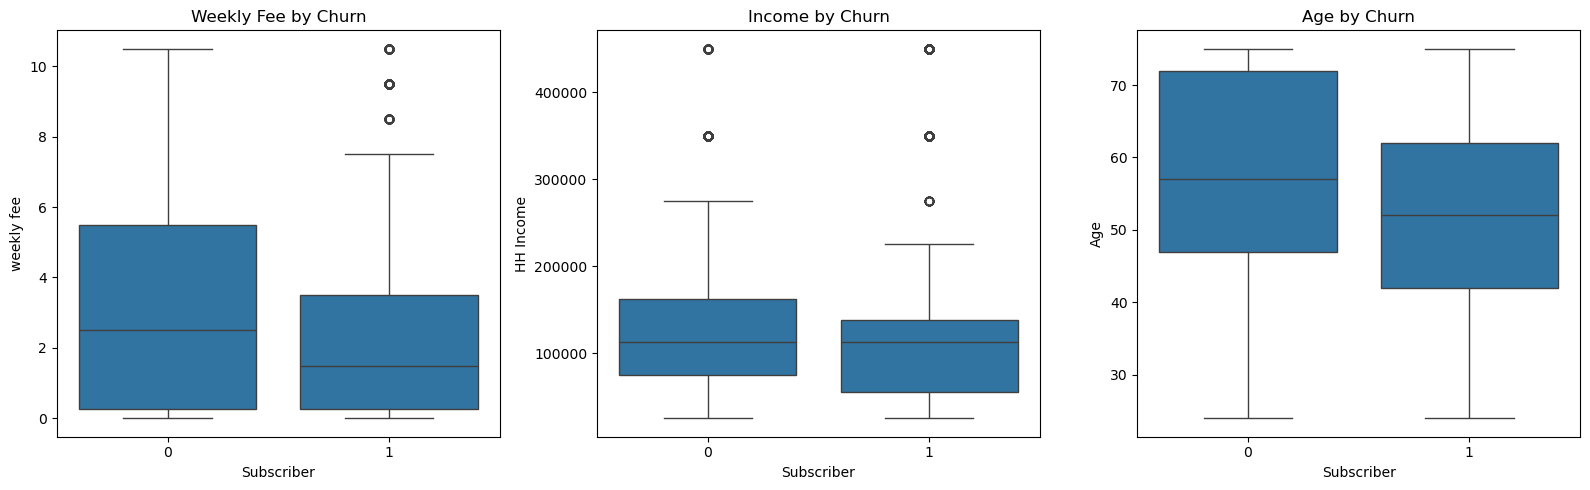

In [29]:

# 시각화: 6. 연속형 변수별 이탈 여부 분포
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Subscriber', y='weekly fee', data=df_vis)
plt.title('Weekly Fee by Churn')

plt.subplot(1, 3, 2)
sns.boxplot(x='Subscriber', y='HH Income', data=df_vis)
plt.title('Income by Churn')

plt.subplot(1, 3, 3)
sns.boxplot(x='Subscriber', y='Age', data=df_vis)
plt.title('Age by Churn')

plt.tight_layout()
plt.show()


- 주간 요금이 낮을수록 고객이 이탈할 가능성이 높아 보임
- 가구 소득은 이탈 여부와 큰 차이를 보이지 않음.
- 나이가 많은 고객들은 구독을 유지하는 경향이 강하며, 젊은 층에서 이탈 가능성이 높음.

## <div style="text-align: left; background-color: #ffd700; font-family: Trebuchet MS; padding: 15px; line-height: 1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 22px; color:#333">Research Question 4 | 고객 유형의 분포</div>

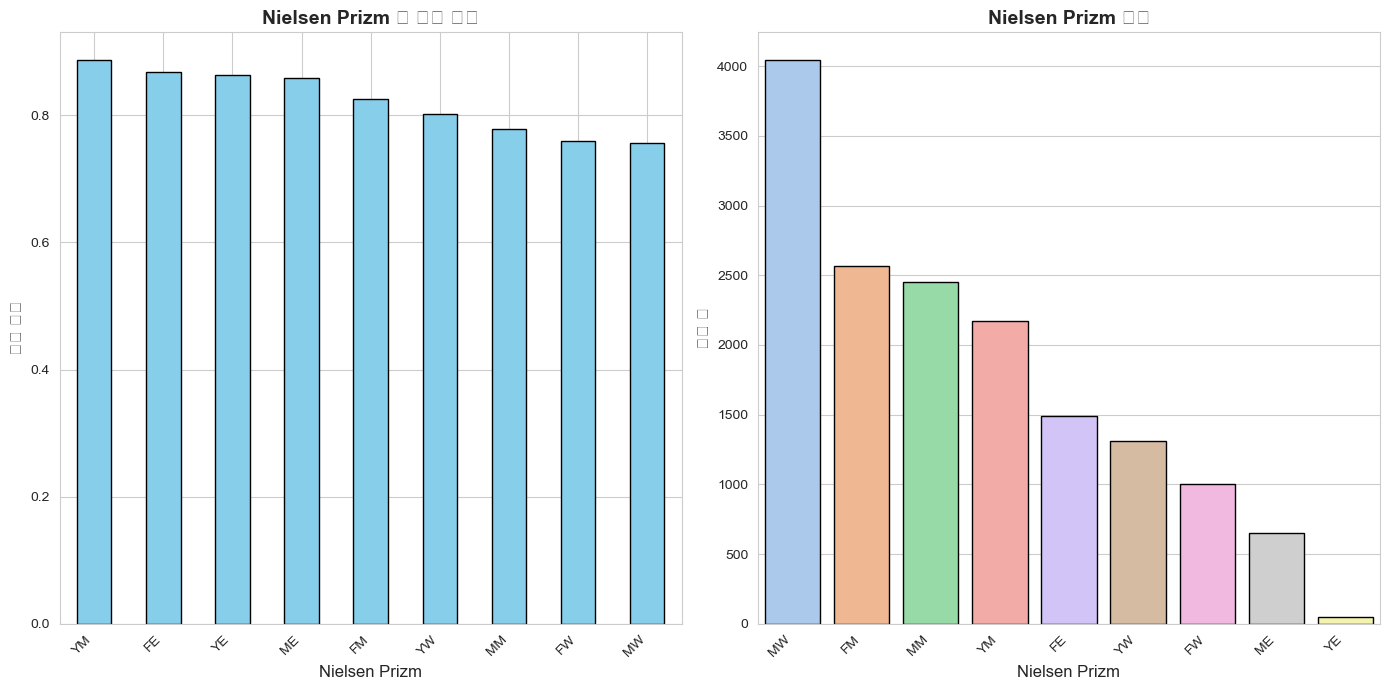

In [30]:
# Nielsen Prizm 별 이탈 비율 계산
churn_rate = newspaper_df.groupby('Nielsen Prizm')['Subscriber'].apply(lambda x: (x == 'NO').mean()).sort_values(ascending=False)

# 그래프 스타일 설정
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Nielsen Prizm 별 이탈 비율 막대 그래프
ax1 = plt.subplot(121)
churn_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Nielsen Prizm 별 이탈 비율', fontsize=14, fontweight='bold')
plt.xlabel('Nielsen Prizm', fontsize=12)
plt.ylabel('이탈 비율', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')

# Nielsen Prizm 분포 countplot
ax2 = plt.subplot(122)
sns.countplot(data=newspaper_df, x='Nielsen Prizm', order=newspaper_df['Nielsen Prizm'].value_counts().index, palette='pastel', edgecolor='black')
plt.title('Nielsen Prizm 분포', fontsize=14, fontweight='bold')
plt.xlabel('Nielsen Prizm', fontsize=12)
plt.ylabel('고객 수', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')

plt.tight_layout()
plt.show()


- 특정 유형에 관계없이 고객 이탈이 전반적으로 높음
- 'MW' 유형이 가장 많고, 'YE' 유형이 가장 적음. 특정 유형의 고객이 다른 유형보다 더 많이 존재한다는 것을 보여줌.

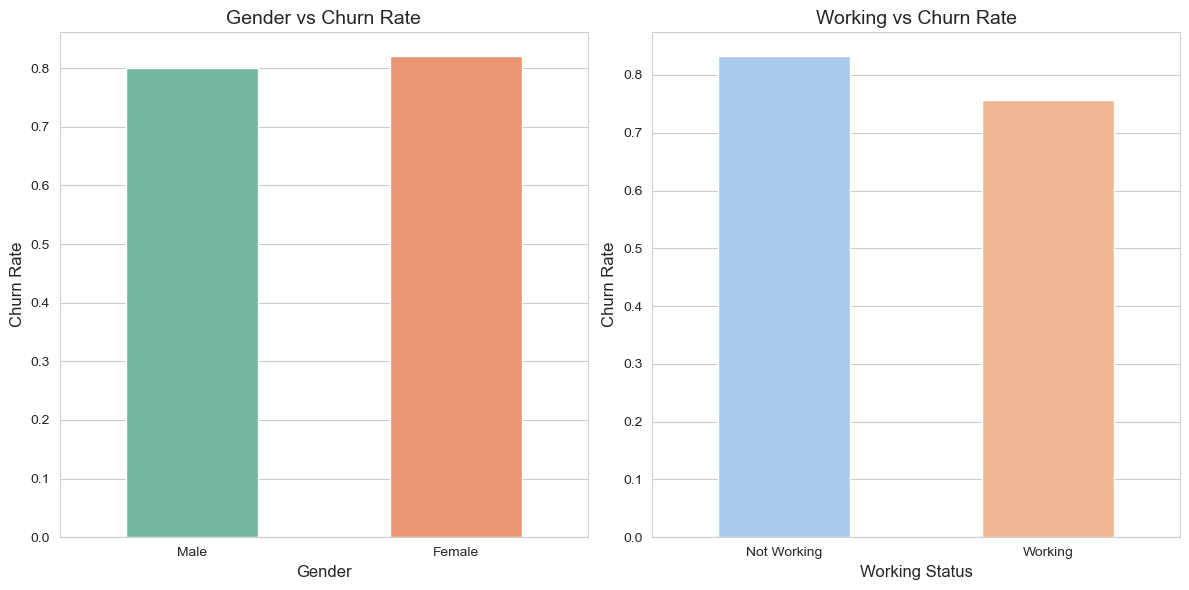

In [31]:
# 전처리 후
# Nielsen Prizm -> Gender, Working
plt.figure(figsize=(12, 6))

# Gender vs Churn Rate
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Gender', y='Subscriber', data=process_df, palette='Set2', ci=None, width=0.5)  # 막대 두께 조정 (width=0.5)
ax1.set_xticklabels(['Male', 'Female'])  # x축 이름을 문자열로 변경
plt.title('Gender vs Churn Rate', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)

# Working vs Churn Rate
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Working', y='Subscriber', data=process_df, palette='pastel', ci=None, width=0.5)  # 막대 두께 조정 (width=0.5)
ax2.set_xticklabels(['Not Working', 'Working'])  # x축 이름을 문자열로 변경
plt.title('Working vs Churn Rate', fontsize=14)
plt.xlabel('Working Status', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)

plt.tight_layout()
plt.show()

- 남성과 여성 간의 이탈률 차이가 거의 없음
- 비근로자 그룹은 근로자 그룹보다 약간 더 높은 이탈 가능성을 보임

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">6| Communicate Results</div>

<a id='conclusions'></a>
<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 20px; background-color: #E8F6EF; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.1); text-align: left;">
    <h2 style="color: #17A05D; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-size: 24px; font-weight: bold; margin-bottom: 10px;">
        Conclusions</h2>
        <ol style="font-size: 18px; color: #333;">
            <li>결과1</li>
            <li>결과2</li>
            <li>결과3</li>
            <li>결과4</li>
        </ol>
</div>

In [32]:
# no_nan_df

In [33]:
# from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# data = no_nan_df
# no_non_df = pd.DataFrame(data)

# # 특징(X)과 타겟(y) 분리
# X = no_non_df.drop("Subscriber", axis=1)
# y = no_non_df["Subscriber"]

# # 학습 및 테스트 데이터 분리
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 의사결정나무 모델 초기화
# clf = DecisionTreeClassifier(random_state=42)

# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'max_depth': [3, 5, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'criterion': ['gini', 'entropy']
# }

# # Stratified K-Fold 설정 (클래스 비율 유지)
# skf = StratifiedKFold(n_splits=5)

# # GridSearchCV를 사용하여 하이퍼파라미터 탐색 및 교차 검증
# grid_search = GridSearchCV(estimator=clf,
#                            param_grid=param_grid,
#                            cv=skf,
#                            scoring='accuracy',
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터와 점수 출력
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Cross-Validated Accuracy:", best_score)


# # 최적의 모델로 테스트 데이터 예측
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_train)
# y_pred_proba = best_model.predict_proba(X_train)[:, 1]  # ROC-AUC 계산을 위한 확률값


# # 성능 평가 지표 계산 및 출력
# accuracy = accuracy_score(y_train, y_pred)
# precision = precision_score(y_train, y_pred)
# recall = recall_score(y_train, y_pred)
# f1 = f1_score(y_train, y_pred)
# roc_auc = roc_auc_score(y_train, y_pred_proba)
# print("\n모델 성능 평가 지표:")
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-Score:", f1)
# print("ROC-AUC Score:", roc_auc)

# y_pred = best_model.predict(X_test)
# y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # ROC-AUC 계산을 위한 확률값

# # 성능 평가 지표 계산 및 출력
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred_proba)

# print("\n모델 성능 평가 지표:")
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-Score:", f1)
# print("ROC-AUC Score:", roc_auc)

# print(classification_report(y_test, y_pred))

# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report)
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

data = no_nan_df
no_non_df = pd.DataFrame(data)

# 출력 설정 (모든 컬럼 표시 및 너비 확장)
pd.set_option('display.max_columns', None)
np.set_printoptions(linewidth=1000)

# 데이터 준비 (no_non_df는 사용자가 제공한 데이터프레임)
X = no_non_df.drop("Subscriber", axis=1)  # 특징 데이터
y = no_non_df["Subscriber"]  # 타겟 데이터

# 데이터 분할 (훈련/테스트 데이터 분리)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 적용 (클래스 불균형 해결)
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 클래스 비율 1:2로 조정
X_res, y_res = smote.fit_resample(X_train, y_train)

# 모델 정의 및 클래스 가중치 설정
clf = DecisionTreeClassifier(
    random_state=42,
    class_weight={0:4, 1:1}  # 클래스 가중치 설정 (소수 클래스에 더 높은 가중치)
)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', None]
}

# Stratified K-Fold 교차 검증 설정
skf = StratifiedKFold(n_splits=5)

# GridSearchCV를 사용하여 하이퍼파라미터 탐색 및 모델 학습
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=skf,
    scoring='balanced_accuracy',  # 불균형 데이터에 적합한 평가 지표
    n_jobs=-1
)

# 모델 학습 수행 (SMOTE로 리샘플링된 데이터 사용)
grid_search.fit(X_res, y_res)

# 최적의 모델 추출
best_model = grid_search.best_estimator_

# 성능 평가 함수 정의
def evaluate_model(model, X, y, dataset_name):
    """
    모델 성능 평가 함수.
    
    Args:
        model: 학습된 머신러닝 모델.
        X: 입력 데이터.
        y: 실제 타겟값.
        dataset_name: 평가 대상 데이터셋 이름 (훈련/테스트).
    """
    y_pred = model.predict(X)  # 예측값 생성
    y_proba = model.predict_proba(X)[:, 1]  # 양성 클래스 확률값
    
    # 주요 성능 지표 출력
    print(f"\n📊 {dataset_name} 성능 평가:")
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"Precision: {precision_score(y, y_pred):.4f}")
    print(f"Recall: {recall_score(y, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y, y_pred):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y, y_proba):.4f}")
    
    # 분류 보고서를 DataFrame으로 변환하여 출력
    report = classification_report(y, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    
    print(f"\n{classification_report(y, y_pred)}")  # 기존 텍스트 출력 유지
    print("\n📝 상세 보고서:")
    display(report_df)  # Jupyter 환경에서는 표 형태로 출력

# 훈련 데이터 평가 수행
evaluate_model(best_model, X_train, y_train, "훈련 데이터")

# 테스트 데이터 평가 수행
evaluate_model(best_model, X_test, y_test, "테스트 데이터")





📊 훈련 데이터 성능 평가:
Accuracy: 0.7068
Precision: 0.9423
Recall: 0.6780
F1-Score: 0.7886
ROC-AUC Score: 0.8212

              precision    recall  f1-score   support

           0       0.38      0.83      0.52      2434
           1       0.94      0.68      0.79     10146

    accuracy                           0.71     12580
   macro avg       0.66      0.75      0.66     12580
weighted avg       0.83      0.71      0.74     12580


📝 상세 보고서:


,precision,recall,f1-score,support
0,0.381250,0.827034,0.521908,2434.000000
1,0.942329,0.678001,0.788605,10146.000000
accuracy,0.706836,0.706836,0.706836,0.706836
macro avg,0.661789,0.752517,0.655257,12580.000000
weighted avg,0.833770,0.706836,0.737004,12580.000000



📊 테스트 데이터 성능 평가:
Accuracy: 0.6879
Precision: 0.9317
Recall: 0.6654
F1-Score: 0.7763
ROC-AUC Score: 0.7833

              precision    recall  f1-score   support

           0       0.35      0.79      0.48       585
           1       0.93      0.67      0.78      2561

    accuracy                           0.69      3146
   macro avg       0.64      0.73      0.63      3146
weighted avg       0.82      0.69      0.72      3146


📝 상세 보고서:


,precision,recall,f1-score,support
0,0.349279,0.786325,0.483701,585.000000
1,0.931657,0.665365,0.776310,2561.000000
accuracy,0.687858,0.687858,0.687858,0.687858
macro avg,0.640468,0.725845,0.630006,3146.000000
weighted avg,0.823363,0.687858,0.721899,3146.000000


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report)
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# 데이터 준비
data = no_nan_df  # 사용자가 제공한 데이터프레임
no_non_df = pd.DataFrame(data)

# 특징/타겟 분리
X = no_non_df.drop("Subscriber", axis=1)  # 특징 데이터
y = no_non_df["Subscriber"]  # 타겟 변수

# 데이터 분할 (Stratified로 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# SMOTE 적용 (클래스 불균형 해결)
smote = SMOTE(sampling_strategy=0.67, random_state=42)  # 클래스 비율 1:1.5로 조정
X_res, y_res = smote.fit_resample(X_train, y_train)

# DecisionTreeClassifier 정의 및 클래스 가중치 설정
clf = DecisionTreeClassifier(
    random_state=42,
    class_weight={0:6, 1:1}  # 클래스 가중치 조정 (클래스 0에 더 높은 패널티)
)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [5, 7, 9],          # 트리 깊이 조정
    'min_samples_split': [5, 10],    # 분할 최소 샘플 수 증가
    'min_samples_leaf': [2, 4],      # 리프 노드 최소 샘플 수 증가
    'criterion': ['entropy'],        # 엔트로피 기준 사용
    'max_features': [0.6, 0.8]       # 무작위 특징 선택 강화
}

# Stratified K-Fold + GridSearchCV 설정
skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=skf,
    scoring='roc_auc',  # AUC 기반 평가
    n_jobs=-1,
    verbose=1
)

# 모델 학습 (SMOTE 적용 데이터 사용)
grid_search.fit(X_res, y_res)
best_model = grid_search.best_estimator_

# 성능 평가 함수 정의 (기본 임계값 사용)
def evaluate_model(model, X, y, dataset_name):
    """
    모델 성능 평가 함수.
    
    Args:
        model: 학습된 머신러닝 모델.
        X: 입력 데이터.
        y: 실제 타겟값.
        dataset_name: 평가 대상 데이터셋 이름 (훈련/테스트).
    
    Returns:
        None. 결과를 출력합니다.
    """
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    print(f"\n📊 {dataset_name} 성능 평가:")
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"Precision: {precision_score(y, y_pred):.4f}")
    print(f"Recall: {recall_score(y, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y, y_pred):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y, y_proba):.4f}")
    
    report = classification_report(y_true=y, y_pred=y_pred, target_names=['Class 0', 'Class 1'], digits=4)
    
    print("\n              precision    recall  f1-score   support")
    print(report)

# 훈련 데이터 평가 수행
evaluate_model(best_model, X_train, y_train, "훈련 데이터")

# 테스트 데이터 평가 수행
evaluate_model(best_model, X_test, y_test, "테스트 데이터")


Fitting 5 folds for each of 24 candidates, totalling 120 fits

📊 훈련 데이터 성능 평가:
Accuracy: 0.5249
Precision: 0.9763
Recall: 0.4222
F1-Score: 0.5895
ROC-AUC Score: 0.8139

              precision    recall  f1-score   support
              precision    recall  f1-score   support

     Class 0     0.2824    0.9569    0.4361      2415
     Class 1     0.9763    0.4222    0.5895     10165

    accuracy                         0.5249     12580
   macro avg     0.6294    0.6896    0.5128     12580
weighted avg     0.8431    0.5249    0.5601     12580


📊 테스트 데이터 성능 평가:
Accuracy: 0.5102
Precision: 0.9647
Recall: 0.4087
F1-Score: 0.5742
ROC-AUC Score: 0.7876

              precision    recall  f1-score   support
              precision    recall  f1-score   support

     Class 0     0.2736    0.9371    0.4235       604
     Class 1     0.9647    0.4087    0.5742      2542

    accuracy                         0.5102      3146
   macro avg     0.6191    0.6729    0.4988      3146
weighted avg    

In [35]:
# from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report

# data = no_nan_df
# no_non_df = pd.DataFrame(data)

# # 특징(X)과 타겟(y) 분리
# X = no_non_df.drop("Subscriber", axis=1)
# y = no_non_df["Subscriber"]

# # 학습 및 테스트 데이터 분리
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 랜덤 포레스트 모델 초기화
# rf_clf = RandomForestClassifier(random_state=42)

# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'criterion': ['gini', 'entropy']
# }

# # Stratified K-Fold 설정 (클래스 비율 유지)
# skf = StratifiedKFold(n_splits=5)

# # GridSearchCV를 사용하여 하이퍼파라미터 탐색 및 교차 검증
# grid_search_rf = GridSearchCV(estimator=rf_clf,
#                               param_grid=param_grid,
#                               cv=skf,
#                               scoring='accuracy',
#                               n_jobs=-1)

# grid_search_rf.fit(X_train, y_train)

# # 최적의 하이퍼파라미터와 점수 출력
# best_params_rf = grid_search_rf.best_params_
# best_score_rf = grid_search_rf.best_score_

# print("Best Parameters (Random Forest):", best_params_rf)
# print("Best Cross-Validated Accuracy (Random Forest):", best_score_rf)

# # 최적의 모델로 테스트 데이터 예측
# best_rf_model = grid_search_rf.best_estimator_
# y_pred = best_model.predict(X_train)
# y_pred_proba = best_model.predict_proba(X_train)[:, 1]  # ROC-AUC 계산을 위한 확률값

# # 성능 평가 지표 계산 및 출력
# accuracy = accuracy_score(y_train, y_pred)
# precision = precision_score(y_train, y_pred)
# recall = recall_score(y_train, y_pred)
# f1 = f1_score(y_train, y_pred)
# roc_auc = roc_auc_score(y_train, y_pred_proba)
# print("\n모델 성능 평가 지표:")
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-Score:", f1)
# print("ROC-AUC Score:", roc_auc)

# y_pred = best_model.predict(X_test)
# y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # ROC-AUC 계산을 위한 확률값

# # 성능 평가 지표 계산 및 출력
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred_proba)

# print("\n모델 성능 평가 지표:")
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-Score:", f1)
# print("ROC-AUC Score:", roc_auc)

# print(classification_report(y_test, y_pred))


# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report)
from imblearn.over_sampling import SMOTE
import pandas as pd

# 출력 설정 (모든 행과 열 표시)
pd.set_option('display.max_rows', None)  # 모든 행 표시
pd.set_option('display.max_columns', None)  # 모든 열 표시
pd.set_option('display.width', 1000)  # 출력 너비 확장

# 데이터 준비
data = no_nan_df  # 사용자가 제공한 데이터프레임
no_non_df = pd.DataFrame(data)
X = no_non_df.drop("Subscriber", axis=1)  # 특징 데이터
y = no_non_df["Subscriber"]  # 타겟 데이터

# 데이터 분할 (Stratified로 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,  # 클래스 분포 유지
    random_state=42
)

# SMOTE 적용 (클래스 0 증강)
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 클래스 비율 약 1:2로 조정
X_res, y_res = smote.fit_resample(X_train, y_train)

# 랜덤 포레스트 모델 정의 및 클래스 가중치 설정
rf_clf = RandomForestClassifier(
    random_state=42,
    class_weight={0:6, 1:1},  # 클래스 가중치 강화 (소수 클래스에 더 높은 가중치)
    bootstrap=True  # 부트스트랩 샘플링 활성화
)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [200, 300],  # 트리 수 증가
    'max_depth': [5, 7, None],  # 최대 깊이 설정
    'min_samples_split': [5, 10],  # 내부 노드 분할 최소 샘플 수
    'min_samples_leaf': [2, 4],  # 리프 노드 최소 샘플 수
    'max_features': ['sqrt', 0.8]  # 특징 선택 다양화
}

# Stratified K-Fold + GridSearchCV 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=skf,
    scoring='roc_auc',  # AUC 최적화
    n_jobs=-1,
    verbose=1
)

# 모델 학습 (SMOTE 적용 데이터 사용)
grid_search_rf.fit(X_res, y_res)

# 최적 모델 추출
best_rf_model = grid_search_rf.best_estimator_

# 성능 평가 함수 정의 (요청된 형식으로 출력)
def evaluate_rf(model, X, y, dataset_name):
    """
    모델 성능 평가 함수.
    
    Args:
        model: 학습된 머신러닝 모델.
        X: 입력 데이터.
        y: 실제 타겟값.
        dataset_name: 평가 대상 데이터셋 이름 (훈련/테스트).
    """
    y_pred = model.predict(X)  # 예측값 생성
    y_proba = model.predict_proba(X)[:, 1]  # 양성 클래스 확률값
    
    # 주요 성능 지표 출력
    print(f"\n📊 {dataset_name} 성능 평가:")
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"Precision: {precision_score(y, y_pred):.4f}")
    print(f"Recall: {recall_score(y, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y, y_pred):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y, y_proba):.4f}")
    
    # 분류 보고서 생성 및 DataFrame 변환
    report_dict = classification_report(
        y_true=y,
        y_pred=y_pred,
        output_dict=True,
        digits=4,
        target_names=['Class 0', 'Class 1']
    )
    
    report_df = pd.DataFrame(report_dict).transpose()
    
    print("\n              precision    recall  f1-score   support")
    
    for index in report_df.index:
        row_values = report_df.loc[index]
        if index in ['accuracy', 'macro avg', 'weighted avg']:
            print(f"{index:<15} {row_values['precision']:.6f} {row_values['recall']:.6f} {row_values['f1-score']:.6f} {row_values['support']:.6f}")
        else:
            print(f"{index:<15} {row_values['precision']:.6f} {row_values['recall']:.6f} {row_values['f1-score']:.6f} {row_values['support']:.0f}")

# 훈련 데이터 평가 수행
evaluate_rf(best_rf_model, X_train, y_train, "훈련 데이터")

# 테스트 데이터 평가 수행
evaluate_rf(best_rf_model, X_test, y_test, "테스트 데이터")


Fitting 5 folds for each of 48 candidates, totalling 240 fits

📊 훈련 데이터 성능 평가:
Accuracy: 0.8895
Precision: 0.9907
Recall: 0.8714
F1-Score: 0.9272
ROC-AUC Score: 0.9719

              precision    recall  f1-score   support
Class 0         0.640835 0.965631 0.770400 2415
Class 1         0.990717 0.871422 0.927248 10165
accuracy        0.889507 0.889507 0.889507 0.889507
macro avg       0.815776 0.918527 0.848824 12580.000000
weighted avg    0.923550 0.889507 0.897138 12580.000000

📊 테스트 데이터 성능 평가:
Accuracy: 0.7632
Precision: 0.9017
Recall: 0.7935
F1-Score: 0.8441
ROC-AUC Score: 0.8068

              precision    recall  f1-score   support
Class 0         0.422442 0.635762 0.507601 604
Class 1         0.901654 0.793470 0.844110 2542
accuracy        0.763191 0.763191 0.763191 0.763191
macro avg       0.662048 0.714616 0.675855 3146.000000
weighted avg    0.809650 0.763191 0.779503 3146.000000


In [53]:
# 필요한 라이브러리 임포트
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report)
from imblearn.over_sampling import SMOTE
import pandas as pd

# 출력 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# 데이터 준비
data = no_nan_df  # 사용자 제공 데이터프레임
X = data.drop("Subscriber", axis=1)
y = data["Subscriber"]

# 데이터 분할 (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,
    random_state=42
)

# StandardScaler 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE 적용 (클래스 0 증강)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_res_scaled, y_res = smote.fit_resample(X_train_scaled, y_train)

# 랜덤 포레스트 모델 설정
rf_clf = RandomForestClassifier(
    random_state=42,
    class_weight={0:6, 1:1},
    bootstrap=True
)

# 하이퍼파라미터 그리드
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [5, 7, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 0.8]
}

# GridSearchCV 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# 모델 학습 (스케일링 + SMOTE 데이터 사용)
grid_search_rf.fit(X_res_scaled, y_res)

# 최적 모델 추출
best_rf_model = grid_search_rf.best_estimator_

# 성능 평가 함수
def evaluate_rf(model, X_scaled, y_true, dataset_name):
    y_pred = model.predict(X_scaled)
    y_proba = model.predict_proba(X_scaled)[:, 1]
    
    print(f"\n📊 {dataset_name} 성능 평가:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_proba):.4f}")
    
    print("\n              precision    recall  f1-score   support")
    report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'], digits=4)
    print(report)

# 평가 수행
print("=== 스케일링 적용 모델 성능 ===")
evaluate_rf(best_rf_model, X_train_scaled, y_train, "훈련 데이터")
evaluate_rf(best_rf_model, X_test_scaled, y_test, "테스트 데이터")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
=== 스케일링 적용 모델 성능 ===

📊 훈련 데이터 성능 평가:
Accuracy: 0.9165
Precision: 0.9975
Recall: 0.8990
F1-Score: 0.9457
ROC-AUC: 0.9844

              precision    recall  f1-score   support
              precision    recall  f1-score   support

     Class 0     0.6996    0.9905    0.8200      2415
     Class 1     0.9975    0.8990    0.9457     10165

    accuracy                         0.9165     12580
   macro avg     0.8486    0.9447    0.8828     12580
weighted avg     0.9403    0.9165    0.9215     12580


📊 테스트 데이터 성능 평가:
Accuracy: 0.7750
Precision: 0.9018
Recall: 0.8096
F1-Score: 0.8532
ROC-AUC: 0.8163

              precision    recall  f1-score   support
              precision    recall  f1-score   support

     Class 0     0.4398    0.6291    0.5177       604
     Class 1     0.9018    0.8096    0.8532      2542

    accuracy                         0.7750      3146
   macro avg     0.6708    0.7194    0.6855      3146
weight

In [37]:
# from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
#                              f1_score, roc_auc_score, classification_report)
# from imblearn.over_sampling import SMOTE
# import pandas as pd

# # 출력 설정 (모든 행과 열 표시)
# pd.set_option('display.max_rows', None)  # 모든 행 표시
# pd.set_option('display.max_columns', None)  # 모든 열 표시
# pd.set_option('display.width', 1000)  # 출력 너비 확장

# # 데이터 준비
# data = no_nan_df  # 사용자가 제공한 데이터프레임
# no_non_df = pd.DataFrame(data)

# # ▶▶▶ 변경된 부분: 특정 열만 선택 ◀◀◀
# selected_features = ['reward program', 'Year Of Residence', 'weekly fee', 'Home Ownership', 'HH Income']
# X = no_non_df[selected_features]  # 선택된 열만 사용
# y = no_non_df["Subscriber"]       # 타겟 변수

# # 데이터 분할 (Stratified로 클래스 비율 유지)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, 
#     test_size=0.2, 
#     stratify=y,
#     random_state=42
# )

# # SMOTE 적용 (클래스 0 증강)
# smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 클래스 비율 약 1:2로 조정
# X_res, y_res = smote.fit_resample(X_train, y_train)

# # 랜덤 포레스트 모델 정의 및 클래스 가중치 설정
# rf_clf = RandomForestClassifier(
#     random_state=42,
#     class_weight={0:6, 1:1},  # 클래스 가중치 강화 (소수 클래스에 더 높은 가중치)
#     bootstrap=True  # 부트스트랩 샘플링 활성화
# )

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'n_estimators': [200, 300],  # 트리 수 증가
#     'max_depth': [5, 7, None],  # 최대 깊이 설정
#     'min_samples_split': [5, 10],  # 내부 노드 분할 최소 샘플 수
#     'min_samples_leaf': [2, 4],  # 리프 노드 최소 샘플 수
#     'max_features': ['sqrt', 0.8]  # 특징 선택 다양화
# }

# # Stratified K-Fold + GridSearchCV 설정
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# grid_search_rf = GridSearchCV(
#     estimator=rf_clf,
#     param_grid=param_grid,
#     cv=skf,
#     scoring='roc_auc',  # AUC 최적화
#     n_jobs=-1,
#     verbose=1
# )

# # 모델 학습 (SMOTE 적용 데이터 사용)
# grid_search_rf.fit(X_res, y_res)

# # 최적 모델 추출
# best_rf_model = grid_search_rf.best_estimator_

# # 성능 평가 함수 정의 (요청된 형식으로 출력)
# def evaluate_rf(model, X, y, dataset_name):
#     """
#     모델 성능 평가 함수.
    
#     Args:
#         model: 학습된 머신러닝 모델.
#         X: 입력 데이터.
#         y: 실제 타겟값.
#         dataset_name: 평가 대상 데이터셋 이름 (훈련/테스트).
#     """
#     y_pred = model.predict(X)  # 예측값 생성
#     y_proba = model.predict_proba(X)[:, 1]  # 양성 클래스 확률값
    
#     # 주요 성능 지표 출력
#     print(f"\n📊 {dataset_name} 성능 평가:")
#     print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
#     print(f"Precision: {precision_score(y, y_pred):.4f}")
#     print(f"Recall: {recall_score(y, y_pred):.4f}")
#     print(f"F1-Score: {f1_score(y, y_pred):.4f}")
#     print(f"ROC-AUC Score: {roc_auc_score(y, y_proba):.4f}")
    
#     # 분류 보고서 생성 및 DataFrame 변환
#     report_dict = classification_report(
#         y_true=y,
#         y_pred=y_pred,
#         output_dict=True,
#         digits=4,
#         target_names=['Class 0', 'Class 1']
#     )
    
#     report_df = pd.DataFrame(report_dict).transpose()
    
#     print("\n              precision    recall  f1-score   support")
    
#     for index in report_df.index:
#         row_values = report_df.loc[index]
#         if index in ['accuracy', 'macro avg', 'weighted avg']:
#             print(f"{index:<15} {row_values['precision']:.4f} {row_values['recall']:.4f} {row_values['f1-score']:.4f} {row_values['support']:.4f}")
#         else:
#             print(f"{index:<15} {row_values['precision']:.4f} {row_values['recall']:.4f} {row_values['f1-score']:.4f} {int(row_values['support'])}")

# # 훈련 데이터 평가 수행
# evaluate_rf(best_rf_model, X_train, y_train, "훈련 데이터")

# # 테스트 데이터 평가 수행
# evaluate_rf(best_rf_model, X_test, y_test, "테스트 데이터")


In [38]:
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.neighbors import KNeighborsClassifier

# # 데이터 분리
# # X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=0)



# smote = SMOTE(random_state=42)
# X_resample, y_resample = smote.fit_resample(df,target)

# X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample , test_size=0.2, random_state=0)

# scaler = StandardScaler()
# X_resample_train_scaled = scaler.fit_transform(X_train)
# X_resample_test_scaled = scaler.transform(X_test)

# knn = KNeighborsClassifier(algorithm='auto', metric='manhattan', n_neighbors=12, weights='uniform')

# knn.fit(X_resample_train_scaled, y_train)
# y_pred_knn = knn.predict(X_resample_test_scaled)

# print(classification_report(y_test, y_pred_knn))
# print(accuracy_score(y_test, y_pred_knn))


# # SMOTE 적용 (증강 비율 증가)
# # smote = SMOTE(random_state=0, sampling_strategy=0.6)
# # X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # 데이터 스케일링
# # scaler = MinMaxScaler()
# # X_train_resampled = scaler.fit_transform(X_train_resampled)
# # X_test = scaler.transform(X_test)

# # MLPClassifier를 위한 하이퍼파라미터 그리드
# param_grid = {
#     'hidden_layer_sizes': [(64, 32, 16), (128, 64, 32), (32, 16, 8)],  # 은닉층 구조 다양화
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],   
#     'learning_rate_init': [0.001, 0.005, 0.01],  # 학습률 튜닝
#     'alpha': [0.0001, 0.001, 0.01],  # 정규화 강도
#     'batch_size': [32, 64, 128],  # 미니 배치 크기 조정
#     'max_iter': [500, 1000],  # 에포크 증가
# }

# # 모델 정의
# mlp = MLPClassifier(early_stopping=True, random_state=0)

# # 그리드 서치 설정
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
# grid_search = GridSearchCV(mlp, param_grid, scoring='f1_weighted', cv=cv, n_jobs=-1, verbose=2)

# # 모델 학습 및 최적 파라미터 탐색
# grid_search.fit(X_train, y_train)

# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best F1-Score: {grid_search.best_score_:.4f}")

# # 최적 모델로 예측
# best_mlp = grid_search.best_estimator_
# y_pred = best_mlp.predict(X_test)

# # 평가
# accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy:", accuracy)
# print(classification_report(y_test, y_pred))


In [43]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score, make_scorer
from catboost import CatBoostClassifier

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# StandardScaler 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE 적용 (스케일링된 데이터 사용)
smote = SMOTE(random_state=42)
X_res_scaled, y_res = smote.fit_resample(X_train_scaled, y_train)

# CatBoost 파라미터 그리드
param_grid = {
    'depth': [6, 10],
    'iterations': [500, 1000],
    'learning_rate': [0.03, 0.1],
    'l2_leaf_reg': [1, 3],
    'class_weights': [{0:3, 1:1}]
}

# 평가 지표 설정
f1_scorer = make_scorer(f1_score, pos_label=0)

# 모델 정의
catboost = CatBoostClassifier(
    random_seed=42,
    eval_metric='F1',
    early_stopping_rounds=50,
    verbose=0
)

# 그리드 서치
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    catboost,
    param_grid,
    scoring=f1_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# 학습
grid_search.fit(X_res_scaled, y_res)

# 결과 출력
print(f"최적 파라미터: {grid_search.best_params_}")
print(f"최고 F1-Score(0): {grid_search.best_score_:.4f}")

# 평가
best_cb = grid_search.best_estimator_
y_pred = best_cb.predict(X_test_scaled)

print("\n테스트 성능:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
최적 파라미터: {'class_weights': {0: 3, 1: 1}, 'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
최고 F1-Score(0): 0.8809

테스트 성능:
              precision    recall  f1-score   support

           0       0.47      0.48      0.47       604
           1       0.87      0.87      0.87      2542

    accuracy                           0.80      3146
   macro avg       0.67      0.67      0.67      3146
weighted avg       0.80      0.80      0.80      3146



In [44]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score, make_scorer
from catboost import CatBoostClassifier

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# MinMaxScaler 적용
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE 적용 (스케일링된 데이터 사용)
smote = SMOTE(random_state=42)
X_res_scaled, y_res = smote.fit_resample(X_train_scaled, y_train)

# CatBoost 파라미터 그리드
param_grid = {
    'depth': [6, 10],
    'iterations': [500, 1000],
    'learning_rate': [0.03, 0.1],
    'l2_leaf_reg': [1, 3],
    'class_weights': [{0:3, 1:1}]
}

# 평가 지표 설정
f1_scorer = make_scorer(f1_score, pos_label=0)

# 모델 정의
catboost = CatBoostClassifier(
    random_seed=42,
    eval_metric='F1',
    early_stopping_rounds=50,
    verbose=0
)

# 그리드 서치
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    catboost,
    param_grid,
    scoring=f1_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# 학습
grid_search.fit(X_res_scaled, y_res)

# 결과 출력
print(f"최적 파라미터: {grid_search.best_params_}")
print(f"최고 F1-Score(0): {grid_search.best_score_:.4f}")

# 평가
best_cb = grid_search.best_estimator_
y_pred = best_cb.predict(X_test_scaled)

print("\n테스트 성능:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
최적 파라미터: {'class_weights': {0: 3, 1: 1}, 'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
최고 F1-Score(0): 0.8800

테스트 성능:
              precision    recall  f1-score   support

           0       0.46      0.48      0.47       604
           1       0.88      0.86      0.87      2542

    accuracy                           0.79      3146
   macro avg       0.67      0.67      0.67      3146
weighted avg       0.80      0.79      0.79      3146



In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report)
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# 데이터 준비
data = no_nan_df
X = data.drop("Subscriber", axis=1)
y = data["Subscriber"]

# 데이터 분할 (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# MinMaxScaler 적용
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE 적용 (스케일링된 데이터 사용)
smote = SMOTE(sampling_strategy=0.67, random_state=42)
X_res_scaled, y_res = smote.fit_resample(X_train_scaled, y_train)

# 모델 및 하이퍼파라미터 설정
clf = DecisionTreeClassifier(
    random_state=42,
    class_weight={0:6, 1:1}
)

param_grid = {
    'max_depth': [5, 7, 9],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'criterion': ['entropy'],
    'max_features': [0.6, 0.8]
}

# 그리드 서치
grid_search = GridSearchCV(
    clf, param_grid, 
    cv=StratifiedKFold(n_splits=5),
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_res_scaled, y_res)
best_model = grid_search.best_estimator_

# 성능 평가 함수 (스케일링된 데이터 사용)
def evaluate_model(model, X_scaled, y_true, dataset_name):
    y_pred = model.predict(X_scaled)
    y_proba = model.predict_proba(X_scaled)[:,1]
    
    print(f"\n📊 {dataset_name} 성능 평가:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_proba):.4f}")
    
    print("\n              precision    recall  f1-score   support")
    print(classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'], digits=4))

# 평가 수행
print("=== 스케일링 적용 모델 성능 ===")
evaluate_model(best_model, X_train_scaled, y_train, "훈련 데이터")
evaluate_model(best_model, X_test_scaled, y_test, "테스트 데이터")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
=== 스케일링 적용 모델 성능 ===

📊 훈련 데이터 성능 평가:
Accuracy: 0.6126
Precision: 0.9592
Recall: 0.5437
F1-Score: 0.6940
ROC-AUC: 0.8297

              precision    recall  f1-score   support
              precision    recall  f1-score   support

     Class 0     0.3197    0.9027    0.4722      2415
     Class 1     0.9592    0.5437    0.6940     10165

    accuracy                         0.6126     12580
   macro avg     0.6395    0.7232    0.5831     12580
weighted avg     0.8365    0.6126    0.6515     12580


📊 테스트 데이터 성능 평가:
Accuracy: 0.6068
Precision: 0.9528
Recall: 0.5401
F1-Score: 0.6894
ROC-AUC: 0.8113

              precision    recall  f1-score   support
              precision    recall  f1-score   support

     Class 0     0.3144    0.8874    0.4643       604
     Class 1     0.9528    0.5401    0.6894      2542

    accuracy                         0.6068      3146
   macro avg     0.6336    0.7138    0.5769      3146
weight

In [54]:
# 필요한 라이브러리 임포트
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score, make_scorer
from catboost import CatBoostClassifier

# 데이터 준비
data = no_nan_df  # 사용자 제공 데이터프레임
X = data.drop("Subscriber", axis=1)  # 특징 데이터
y = data["Subscriber"]  # 타겟 변수

# 데이터 분리 (Stratified로 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# MinMaxScaler 적용 (스케일링)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE 적용 (스케일링된 데이터 사용)
smote = SMOTE(random_state=42)
X_resampled_scaled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# CatBoost 하이퍼파라미터 그리드 설정
param_grid = {
    'depth': [6, 10],              # 트리 깊이
    'iterations': [500, 1000],     # 부스팅 반복 횟수
    'learning_rate': [0.03, 0.1],  # 학습률
    'l2_leaf_reg': [1, 3],         # L2 정규화 강도
    'class_weights': [{0:3, 1:1}]  # 클래스 가중치 (클래스 불균형 대응)
}

# 평가 지표 설정 (F1-Score 기준으로 최적화)
f1_scorer = make_scorer(f1_score, pos_label=0)

# CatBoost 모델 정의
catboost = CatBoostClassifier(
    random_seed=42,
    eval_metric='F1',
    early_stopping_rounds=50,
    verbose=0  # 학습 로그 출력 억제
)

# Stratified K-Fold + GridSearchCV 설정
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# 모델 학습 (SMOTE 적용 데이터 사용)
grid_search.fit(X_resampled_scaled, y_resampled)

# 최적 모델 추출 및 결과 출력
best_cb_model = grid_search.best_estimator_
print(f"최적 파라미터: {grid_search.best_params_}")
print(f"최고 F1-Score(0): {grid_search.best_score_:.4f}")

# 테스트 데이터 평가 수행
y_pred = best_cb_model.predict(X_test_scaled)

print("\n📊 테스트 데이터 성능 평가:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
최적 파라미터: {'class_weights': {0: 3, 1: 1}, 'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
최고 F1-Score(0): 0.8800

📊 테스트 데이터 성능 평가:
              precision    recall  f1-score   support

           0       0.46      0.48      0.47       604
           1       0.88      0.86      0.87      2542

    accuracy                           0.79      3146
   macro avg       0.67      0.67      0.67      3146
weighted avg       0.80      0.79      0.79      3146



In [52]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report)
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# 데이터 준비
data = no_nan_df
X = data.drop("Subscriber", axis=1)
y = data["Subscriber"]

# 데이터 분할 (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# MinMaxScaler 적용
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE 적용 (스케일링된 데이터 사용)
smote = SMOTE(sampling_strategy=0.67, random_state=42)
X_res_scaled, y_res = smote.fit_resample(X_train_scaled, y_train)

# 모델 및 파라미터 설정
clf = DecisionTreeClassifier(
    random_state=42,
    class_weight={0:6, 1:1}
)

param_grid = {
    'max_depth': [5, 7, 9],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'criterion': ['entropy'],
    'max_features': [0.6, 0.8]
}

# 그리드 서치
grid_search = GridSearchCV(
    clf, param_grid,
    cv=StratifiedKFold(n_splits=5),
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_res_scaled, y_res)
best_model = grid_search.best_estimator_

# 평가 함수 수정 (스케일링 데이터 입력)
def evaluate_model(model, X_scaled, y_true, dataset_name):
    y_pred = model.predict(X_scaled)
    y_proba = model.predict_proba(X_scaled)[:,1]
    
    print(f"\n📊 {dataset_name} 성능 평가:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_proba):.4f}")
    
    print("\n              precision    recall  f1-score   support")
    print(classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'], digits=4))

# 평가 수행
print("=== 스케일링 적용 모델 성능 ===")
evaluate_model(best_model, X_train_scaled, y_train, "훈련 데이터")
evaluate_model(best_model, X_test_scaled, y_test, "테스트 데이터")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
=== 스케일링 적용 모델 성능 ===

📊 훈련 데이터 성능 평가:
Accuracy: 0.6126
Precision: 0.9592
Recall: 0.5437
F1-Score: 0.6940
ROC-AUC: 0.8297

              precision    recall  f1-score   support
              precision    recall  f1-score   support

     Class 0     0.3197    0.9027    0.4722      2415
     Class 1     0.9592    0.5437    0.6940     10165

    accuracy                         0.6126     12580
   macro avg     0.6395    0.7232    0.5831     12580
weighted avg     0.8365    0.6126    0.6515     12580


📊 테스트 데이터 성능 평가:
Accuracy: 0.6068
Precision: 0.9528
Recall: 0.5401
F1-Score: 0.6894
ROC-AUC: 0.8113

              precision    recall  f1-score   support
              precision    recall  f1-score   support

     Class 0     0.3144    0.8874    0.4643       604
     Class 1     0.9528    0.5401    0.6894      2542

    accuracy                         0.6068      3146
   macro avg     0.6336    0.7138    0.5769      3146
weight

In [56]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.9/150.0 MB 16.8 MB/s eta 0:00:09
   - -------------------------------------- 4.7/150.0 MB 11.0 MB/s eta 0:00:14
   -- ------------------------------------- 8.4/150.0 MB 13.3 MB/s eta 0:00:11
   -- ------------------------------------- 11.0/150.0 MB 13.0 MB/s eta 0:00:11
   --- ------------------------------------ 14.7/150.0 MB 13.8 MB/s eta 0:00:10
   ---- ----------------------------------- 15.2/150.0 MB 12.1 MB/s eta 0:00:12
   ---- ----------------------------------- 16.5/150.0 MB 11.7 MB/s eta 0:00:12
   ---- ----------------------------------- 17.6/150.0 MB 10.4 MB/s eta 0:00:13
   ----- ---------------------------------- 21.5/150.0 MB 11.3 MB/s eta 0:00:12
   ------ --------------------------------- 25.4/150.0 MB 12.0 MB/s eta 0:00:11
   ------- -------------------------------- 27.5/150.0 MB 12.0 MB/s eta 0:00:11
   ------- -------------------------------- 29.4/150

In [ ]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# 데이터 준비
data = no_nan_df  # 사용자 제공 데이터프레임
X = data.drop("Subscriber", axis=1)  # 특징 데이터
y = data["Subscriber"]  # 타겟 변수

# 데이터 분할 (Stratified로 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# MinMaxScaler 적용 (스케일링)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE 적용 (스케일링된 데이터 사용)
smote = SMOTE(sampling_strategy=0.67, random_state=42)
X_resampled_scaled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# 개별 모델 정의
dt_clf = DecisionTreeClassifier(
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=2,
    criterion='entropy',
    class_weight={0:6, 1:1},
    random_state=42
)

rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight={0:6, 1:1},
    random_state=42
)

lgbm_clf = LGBMClassifier(
    boosting_type='gbdt',
    class_weight={0:3, 1:1},  # 클래스 불균형 대응
    learning_rate=0.1,
    n_estimators=300,
    max_depth=6,
    random_state=42
)

# 앙상블 모델 정의 (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', dt_clf),
        ('random_forest', rf_clf),
        ('lightgbm', lgbm_clf),
    ],
    voting='soft',  # 확률 기반 앙상블
    n_jobs=-1
)

# 앙상블 모델 학습
voting_clf.fit(X_resampled_scaled, y_resampled)

# 성능 평가 함수 정의
def evaluate_model(model, X_scaled, y_true, dataset_name):
    """
    모델 성능 평가 함수.
    
    Args:
        model: 학습된 머신러닝 모델.
        X_scaled: 스케일링된 입력 데이터.
        y_true: 실제 타겟값.
        dataset_name: 평가 대상 데이터셋 이름 (훈련/테스트).
    
    Returns:
        None. 결과를 출력합니다.
    """
    y_pred = model.predict(X_scaled)
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_scaled)[:, 1]
        auc_score = roc_auc_score(y_true, y_proba)
        print(f"ROC-AUC Score: {auc_score:.4f}")
    
    print(f"\n📊 {dataset_name} 성능 평가:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    
    print("\n              precision    recall  f1-score   support")
    print(classification_report(y_true, y_pred))

# 평가 수행
print("=== 앙상블 모델 성능 ===")
evaluate_model(voting_clf, X_train_scaled, y_train, "훈련 데이터")
evaluate_model(voting_clf, X_test_scaled, y_test, "테스트 데이터")


=== 앙상블 모델 성능 ===


  File "c:\Users\Playdata\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Playdata\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


ROC-AUC Score: 0.8959

📊 훈련 데이터 성능 평가:
Accuracy: 0.6943
Precision: 0.9748
Recall: 0.6382
F1-Score: 0.7713

              precision    recall  f1-score   support
              precision    recall  f1-score   support

           0       0.38      0.93      0.54      2415
           1       0.97      0.64      0.77     10165

    accuracy                           0.69     12580
   macro avg       0.68      0.78      0.66     12580
weighted avg       0.86      0.69      0.73     12580

ROC-AUC Score: 0.8328

📊 테스트 데이터 성능 평가:
Accuracy: 0.6662
Precision: 0.9560
Recall: 0.6153
F1-Score: 0.7487

              precision    recall  f1-score   support
              precision    recall  f1-score   support

           0       0.35      0.88      0.50       604
           1       0.96      0.62      0.75      2542

    accuracy                           0.67      3146
   macro avg       0.65      0.75      0.63      3146
weighted avg       0.84      0.67      0.70      3146

